# Analysis 

# To find the percentage of cancellation of flights for every carrier

/Users/Sneha/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Sneha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


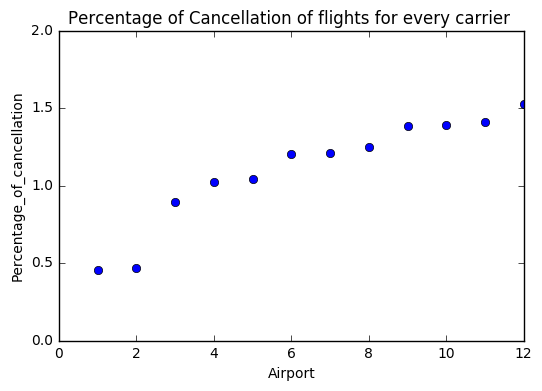

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, islice


##Reading the CSV file from the disk
loc='/Users/Sneha/Downloads/Final_dataset.csv'
data= pd.read_csv(loc)

#Filling the NAN with 0 for DepTime and ArrTime columns
data['DepTime'].fillna(0,inplace=True)
data['ArrTime'].fillna(0,inplace=True)

#Convert the columns to int
data.DepTime=data.DepTime.astype(int)
data.ArrTime=data.ArrTime.astype(int)
req_data= data[['UniqueCarrier','FlightNum','Cancelled','CancellationCode']]

#Groupby based on carrier
r1=req_data.groupby(['UniqueCarrier']).size().reset_index(name='Count')
r2=req_data[req_data['Cancelled']==1]
r2=r2.groupby(['UniqueCarrier','Cancelled']).size().reset_index(name='Count1')
#print (r1.head())
#print (r2.head())

#Concatenate dataframes
r_new = pd.concat([r1, r2], axis=1)

#Percentage of calculation
r_new['Percentage_of_cancellation']=(r_new['Count1']/r_new['Count'])*100
final= r_new.sort(['Percentage_of_cancellation'])
final.rename(columns={'Count': 'Total number of flights', 'Count1': 'Number of flights cancelled'}, inplace=True)
final=final[['UniqueCarrier','Total number of flights','Number of flights cancelled','Percentage_of_cancellation']]
#print(final)

#Writing to csv file
final.to_csv("output_Analysis_5.csv",index = False)

a=final['Percentage_of_cancellation'].tolist()



#Bar plot for the analysis


plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], a, 'bo')
plt.axis([0, 12, 0, 2])
plt.xlabel("Airport")
plt.ylabel("Percentage_of_cancellation")

plt.title('Percentage of Cancellation of flights for every carrier ')
plt.savefig('/Users/Sneha/Downloads/Plot_Analysis_5.png')
plt.show()
